# Cute 3

## Importing the Required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,f1_score,log_loss
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
from sklearn import preprocessing, metrics
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import os
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler,NearMiss,CondensedNearestNeighbour,EditedNearestNeighbours
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.model_selection import KFold, train_test_split
from imblearn.ensemble import EasyEnsemble
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps

## Setting the path/Working directory

In [19]:
os.getcwd()
os.chdir("D:\\Insofe Cute\\CSE7305c_CUTe_ProblemDescription_and_Dataset-1550549022184\\CSE7305c_CUTe_ProblemDescription_and_Dataset")

## Reading the data into a Dataframe

In [20]:
data = pd.read_csv("train.csv",na_values=["NA"," ","","?"])

In [21]:
x_trn = pd.read_csv("test.csv",na_values=["NA"," ","","?"])

## Summary and stays of the data

In [22]:
data.describe(include="all")

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,31283.000000,31276.000000,31276.000000,31276.000000,31181.000000,3.122000e+04,31276.000000,31276.000000,31210.000000,31279.000000,...,3.118200e+04,31277.000000,3.121500e+04,31277.000000,2.971300e+04,31210.000000,3.118200e+04,31181.000000,30682.000000,31283.000000
mean,15642.000000,0.051612,0.551159,0.151249,7.321993,-1.706215e+02,-0.011735,0.120577,14.379693,2.783840,...,-3.637422e+01,-0.007774,4.067219e+01,1.677983,5.462892e+02,15.227988,1.640595e+03,9.656775,81.529420,0.048301
std,9030.768572,1.748230,4.510523,3.754494,347.736044,2.392279e+04,5.489446,6.045041,562.011982,69.973455,...,6.276744e+03,13.989982,6.283661e+03,143.470467,3.792399e+04,219.335078,1.515043e+05,142.374215,2726.762529,0.214405
min,1.000000,-256.890000,-430.870000,-479.730000,-0.045319,-2.722100e+06,-508.120000,-517.480000,-15.236000,-3.496000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-6.590300,-1.496500e+04,-0.367890,-3.726500,0.000000
25%,7821.500000,0.003360,0.269397,0.022146,1.051000,-4.845300e+01,0.000000,0.005758,0.428970,1.018100,...,8.919150e-03,0.014690,8.751350e-01,0.000000,5.533000e+00,4.523400,4.205425e+01,3.099200,2.180375,0.000000
50%,15642.000000,0.049686,0.472685,0.196770,1.571000,-7.813950e-01,0.000000,0.059707,1.068650,1.196700,...,5.306150e-02,0.120460,9.507600e-01,0.005453,9.763000e+00,6.652750,7.120750e+01,5.090700,4.289950,0.000000
75%,23462.500000,0.130523,0.689240,0.403983,2.797800,5.076850e+01,0.087633,0.151895,2.606850,2.060550,...,1.294750e-01,0.286740,9.927900e-01,0.234840,2.014500e+01,10.417750,1.170400e+02,8.618600,9.788950,0.000000
max,31283.000000,94.280000,480.730000,28.336000,53433.000000,1.034100e+06,543.250000,649.230000,53432.000000,9742.300000,...,1.120200e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,26862.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [23]:
x_trn.describe(include="all")

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,6451.000000,6451.000000,6451.000000,6451.000000,6429.000000,6.438000e+03,6451.000000,6451.000000,6437.000000,6449.000000,...,6.450000e+03,6439.000000,6451.000000,6445.000000,6451.000000,6146.000000,6436.000000,6.439000e+03,6429.000000,6341.000000
mean,39779.000000,-0.019729,0.671916,0.035850,3.540007,1.585019e+02,-0.208878,0.000546,7.062295,2.007925,...,6.088847e+03,0.023130,0.034450,3.932018,0.530441,283.327769,13.902278,-4.418735e+01,9.092290,46.106849
std,1862.387625,5.853072,7.881294,7.877168,20.957010,2.054143e+04,10.400030,5.873490,230.439886,21.260431,...,4.220430e+04,7.049784,8.066195,197.802787,21.750395,8061.380944,107.694529,3.018073e+04,72.770389,742.918601
min,36554.000000,-463.890000,0.000000,-445.910000,-0.403110,-6.341400e+05,-486.820000,-463.890000,-3.735100,-0.612590,...,-4.928300e+05,-477.080000,-469.050000,-1.632400,-152.090000,0.000000,-0.014534,-2.336500e+06,-1.543200,-10677.000000
25%,38166.500000,0.003772,0.271310,0.017369,1.038700,-4.988150e+01,0.000000,0.005991,0.427480,1.019700,...,1.958850e+01,0.009892,0.015050,0.878160,0.000000,5.680450,4.549600,4.182800e+01,3.109900,2.166400
50%,39779.000000,0.050048,0.471450,0.194430,1.558600,-1.428250e+00,0.000000,0.059782,1.058700,1.192800,...,1.098150e+03,0.052082,0.117930,0.951960,0.009292,10.058000,6.719050,7.049000e+01,5.145700,4.297500
75%,41391.500000,0.127275,0.687835,0.395880,2.737500,4.848250e+01,0.093908,0.147620,2.589000,2.104000,...,4.880725e+03,0.124810,0.282195,0.992470,0.249175,20.720250,10.660000,1.168050e+02,8.633600,10.024000
max,43004.000000,20.482000,446.910000,17.708000,1017.800000,1.250100e+06,244.310000,38.618000,18148.000000,1704.800000,...,1.634200e+06,293.150000,147.190000,15459.000000,1661.000000,457320.000000,7123.000000,4.513800e+05,5662.400000,28999.000000


In [24]:
data.shape

(31283, 66)

In [25]:
x_trn.shape

(6451, 65)

In [26]:
data.columns.value_counts().sum()

66

In [27]:
x_trn.columns.value_counts().sum()

65

In [28]:
data.dtypes

ID          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
           ...   
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    

In [29]:
x_trn.dtypes

ID          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
           ...   
Attr35    float64
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    

In [30]:
data.index

RangeIndex(start=0, stop=31283, step=1)

In [31]:
num_attr = data.select_dtypes(include=['float64','int64']).columns
num_attr = num_attr[1:64]

## Removing the outliers

### Found the outliers using R ):

In [32]:
data.drop([1774,11095,12118,22626,27494,12472,12472,17236,19153,1026],inplace = True , axis = 0)

In [33]:
init_notebook_mode(connected=True)

In [34]:
temp = data.target.value_counts()
trace = go.Bar(x=temp.index,
               y= np.round(temp.astype(float)/temp.values.sum(),2),
               text = np.round(temp.astype(float)/temp.values.sum(),2),
               textposition = 'auto',
               name = 'Attrition')
data1 = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Bankruptcy Distribution"
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)
del temp

## Assigning ID to Index

In [203]:
data.index = data["ID"]
data.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            31274, 31275, 31276, 31277, 31278, 31279, 31280, 31281, 31282,
            31283],
           dtype='int64', name='ID', length=31274)

In [204]:
x_trn.index = x_trn["ID"]
x_trn.index

Int64Index([36554, 36555, 36556, 36557, 36558, 36559, 36560, 36561, 36562,
            36563,
            ...
            42995, 42996, 42997, 42998, 42999, 43000, 43001, 43002, 43003,
            43004],
           dtype='int64', name='ID', length=6451)

## Dropping ID and Attr37. 

### Most of ATTR37 data have NA values 

In [205]:
data.drop(["ID"],inplace= True,axis = 1)
data.drop(["Attr37"],inplace = True,axis = 1)

In [206]:
x_trn.drop(["ID","Attr37"],inplace= True,axis = 1)

### Attributes to be removed for better results (o_o)
### Found them using verious methods in R such as VIF, Corrilation & StepAIC

In [ ]:
data = data[["Attr1" , "Attr6" ,"Attr9" , "Attr11" , "Attr12" , "Attr13"  , "Attr15"  
     , "Attr24" , "Attr25" , "Attr27" , "Attr28" , "Attr29" ,  "Attr31" ,  
    "Attr33" , "Attr35" , "Attr36" ,  "Attr39" , "Attr40" , "Attr41" , 
    "Attr42" , "Attr43" , "Attr44" , "Attr45" , "Attr46" , "Attr48" , "Attr50" , 
    "Attr51" ,  "Attr53" , "Attr56" , "Attr57" , "Attr58" ,
    "Attr59" , "Attr60" , "Attr61" , "Attr64","target"]]

In [207]:
data.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
           ...   
Attr35    float64
Attr36    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    

In [208]:
data.shape

(31274, 64)

In [209]:
x_trn.shape

(6451, 63)

In [210]:
data.describe(include="all")

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,31267.000000,31267.000000,31267.000000,31172.000000,3.121100e+04,31267.000000,31267.000000,31201.000000,31270.000000,31267.000000,...,3.117300e+04,31268.000000,3.120600e+04,31268.000000,2.970500e+04,31201.000000,3.117300e+04,31172.000000,30674.000000,31274.000000
mean,0.051622,0.551167,0.151234,7.307926,-1.703684e+02,-0.011758,0.120603,14.366198,2.784073,0.704318,...,-3.638471e+01,-0.007815,4.068363e+01,1.678489,5.464326e+02,15.229973,1.641049e+03,9.639857,81.544283,0.048283
std,1.748479,4.511166,3.755029,347.776046,2.392621e+04,5.490234,6.045910,562.086858,69.983521,15.335891,...,6.277650e+03,13.991995,6.284568e+03,143.491111,3.792910e+04,219.366668,1.515262e+05,142.361970,2727.117856,0.214367
min,-256.890000,-430.870000,-479.730000,-0.045319,-2.722100e+06,-508.120000,-517.480000,-15.236000,-3.496000,-479.730000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-6.590300,-1.496500e+04,-0.367890,-3.726500,0.000000
25%,0.003362,0.269420,0.022197,1.051000,-4.843150e+01,0.000000,0.005762,0.429000,1.018100,0.294570,...,8.926200e-03,0.014685,8.751325e-01,0.000000,5.533100e+00,4.523100,4.205500e+01,3.099075,2.180375,0.000000
50%,0.049688,0.472650,0.196780,1.571050,-7.769000e-01,0.000000,0.059709,1.068700,1.196650,0.505220,...,5.306600e-02,0.120470,9.507450e-01,0.005458,9.764100e+00,6.652700,7.120300e+01,5.091150,4.289750,0.000000
75%,0.130525,0.689200,0.404035,2.797575,5.076650e+01,0.087615,0.151900,2.606700,2.060500,0.708415,...,1.295100e-01,0.286710,9.927900e-01,0.234872,2.014500e+01,10.418000,1.170900e+02,8.618450,9.788625,0.000000
max,94.280000,480.730000,28.336000,53433.000000,1.034100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,1.120200e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,26862.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [211]:
x_trn.describe(include="all")

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,6451.000000,6451.000000,6451.000000,6429.000000,6.438000e+03,6451.000000,6451.000000,6437.000000,6449.000000,6451.000000,...,6.450000e+03,6439.000000,6451.000000,6445.000000,6451.000000,6146.000000,6436.000000,6.439000e+03,6429.000000,6341.000000
mean,-0.019729,0.671916,0.035850,3.540007,1.585019e+02,-0.208878,0.000546,7.062295,2.007925,0.351324,...,6.088847e+03,0.023130,0.034450,3.932018,0.530441,283.327769,13.902278,-4.418735e+01,9.092290,46.106849
std,5.853072,7.881294,7.877168,20.957010,2.054143e+04,10.400030,5.873490,230.439886,21.260431,8.556110,...,4.220430e+04,7.049784,8.066195,197.802787,21.750395,8061.380944,107.694529,3.018073e+04,72.770389,742.918601
min,-463.890000,0.000000,-445.910000,-0.403110,-6.341400e+05,-486.820000,-463.890000,-3.735100,-0.612590,-445.910000,...,-4.928300e+05,-477.080000,-469.050000,-1.632400,-152.090000,0.000000,-0.014534,-2.336500e+06,-1.543200,-10677.000000
25%,0.003772,0.271310,0.017369,1.038700,-4.988150e+01,0.000000,0.005991,0.427480,1.019700,0.293175,...,1.958850e+01,0.009892,0.015050,0.878160,0.000000,5.680450,4.549600,4.182800e+01,3.109900,2.166400
50%,0.050048,0.471450,0.194430,1.558600,-1.428250e+00,0.000000,0.059782,1.058700,1.192800,0.503750,...,1.098150e+03,0.052082,0.117930,0.951960,0.009292,10.058000,6.719050,7.049000e+01,5.145700,4.297500
75%,0.127275,0.687835,0.395880,2.737500,4.848250e+01,0.093908,0.147620,2.589000,2.104000,0.705235,...,4.880725e+03,0.124810,0.282195,0.992470,0.249175,20.720250,10.660000,1.168050e+02,8.633600,10.024000
max,20.482000,446.910000,17.708000,1017.800000,1.250100e+06,244.310000,38.618000,18148.000000,1704.800000,266.860000,...,1.634200e+06,293.150000,147.190000,15459.000000,1661.000000,457320.000000,7123.000000,4.513800e+05,5662.400000,28999.000000


In [212]:
x_trn.isna().sum()

Attr1       0
Attr2       0
Attr3       0
Attr4      22
Attr5      13
Attr6       0
Attr7       0
Attr8      14
Attr9       2
Attr10      0
Attr11      7
Attr12     22
Attr13     12
Attr14      0
Attr15      8
Attr16     14
Attr17     14
Attr18      0
Attr19     12
Attr20     12
Attr21    853
Attr22      0
Attr23     12
Attr24    128
Attr25      0
Attr26     14
Attr27    407
Attr28    110
Attr29      0
Attr30     12
         ... 
Attr34     14
Attr35      0
Attr36      0
Attr38      0
Attr39     12
Attr40     22
Attr41    104
Attr42     12
Attr43     12
Attr44     12
Attr45    304
Attr46     22
Attr47     44
Attr48      0
Attr49     12
Attr50     14
Attr51      0
Attr52     44
Attr53    110
Attr54    110
Attr55      1
Attr56     12
Attr57      0
Attr58      6
Attr59      0
Attr60    305
Attr61     15
Attr62     12
Attr63     22
Attr64    110
Length: 63, dtype: int64

## Test and Train split

In [213]:
X = data.drop("target",axis = 1)
Y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Checking the # of 1's and # of 0's in the train data

In [214]:
Counter(y_train)
##Counter(y_test)

Counter({1: 1180, 0: 23839})

## Using Mean for imputing NA values

In [217]:
imp = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imp.fit_transform(X_train))
X_test = pd.DataFrame(imp.transform(X_test))
x_trn = pd.DataFrame(imp.transform(x_trn))

# Trying Verious sampling methods to fix class imbalence problem 

### 1. Random UnderSampling

#### x = RandomUnderSampler(ratio={1 : 1057,0:7000})
X_rs, y_rs = x.fit_sample(X_train, y_train)
Counter(y_rs)

### 2. Symentric Minority Over Sampling Technique (SMOTE)

In [218]:
sm = SMOTE(ratio=0.6,random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

### 3. NearMiss Sampling

#### Nm = NearMiss(ratio= 0.5,version=3,n_neighbors=3,random_state=234)
X_train_res, y_train_res = Nm.fit_sample(X_train, y_train.ravel())

### 4. Condenced Nearest Neighbours

#### Cnn = CondensedNearestNeighbour(random_state=234)
X_train_res, y_train_res = Cnn.fit_sample(X_train, y_train)

### 5. Editted Nearest Neighbours

#### ENN = EditedNearestNeighbours(random_state=234)
X_train_res, y_train_res = ENN.fit_sample(X_train, y_train)

## BEST up to now

### 5. SMOTE with Editted Nearest Neighbours (SMOTE ENN)

#### SENN = SMOTEENN(ratio= 0.6,random_state=0)
X_train_res, y_train_res = SENN.fit_sample(X_train, y_train)

### 6. Ensomble Classifiers

#### ens = EasyEnsemble()
X_train_res, y_train_res = ens.fit_sample(X_train, y_train)

In [219]:
Counter(y_train_res)

Counter({1: 14303, 0: 23839})

In [220]:
Counter(y_train)
X_train_res = pd.DataFrame(X_train_res)
y_train_res =pd.DataFrame(y_train_res)

X = X_train_res1
Y = y_train_res1
X_train_res, X_test, y_train_res, y_test = train_test_split(X, Y, test_size=0.2, random_state=234,stratify= Y)

In [221]:
num_attr = X_train_res.select_dtypes(include=['float64','int64']).columns
num_attr

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62],
           dtype='int64')

In [222]:
X_train_res = pd.DataFrame(X_train_res)
y_train_res =pd.DataFrame(y_train_res)
y_train_res.shape

(38142, 1)

## Standerdizing the data

In [223]:
SS= StandardScaler()
SS.fit(X_train_res)
X_train_res = SS.transform(X_train_res)
X_test = SS.transform(X_test)

In [224]:
x_trn = SS.transform(x_trn)

In [225]:
X_train_res = pd.DataFrame(X_train_res)
X_test = pd.DataFrame(X_test)
x_trn = pd.DataFrame(x_trn)

numeric_transformer = Pipeline(memory ='./' ,steps=[
                       ('scaler', StandardScaler())])

categorical_transformer = Pipeline(memory = './',steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr)])

## Creating a pipeline for most used Classifiers

### Logistic Regression

In [227]:
pipe_lr = Pipeline([
			('clf', LogisticRegression())])

pipe_lr_pca = Pipeline([
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression())])

### Random Forest

In [228]:
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(max_features = 'sqrt'))])


pipe_rf_pca = Pipeline([
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier())])


### SVM

In [229]:
pipe_svm = Pipeline([
			('clf', svm.SVC(probability = True))])

pipe_svm_pca = Pipeline([
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(probability = True))])

### Bagging Classifier

In [230]:
BBC = Pipeline([
    ('clf', BaggingClassifier(base_estimator= XGBClassifier(colsample_bytree=0.5, gamma=1.5, learning_rate= 0.05, n_estimators= 100)))])

### Boosting Models (i.e AdaBoost, GBM, XGBoost, CATBoost)

In [231]:
Adaboost_model_clf = Pipeline([
                     ('clf', AdaBoostClassifier())])
GBM_model_clf = Pipeline([
                     ('clf', GradientBoostingClassifier())])
XGB_model_clf = Pipeline([
                     ('clf', XGBClassifier())])
CAT_model_clf = Pipeline([
                     ('clf', CatBoostClassifier())])


## Setting GridSearch Parameters

In [232]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l2'],
		'clf__C': [1,2,3,4],
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{##'clf__criterion': [ 'entropy'],
        'clf__n_estimators' : [500],
		'clf__min_samples_leaf': [2,4],
		'clf__max_depth': [10,12],
		'clf__min_samples_split': [2,4]
            }]

param_grid_ada = [{'clf__n_estimators' : [ 200,500,600],
                    'clf__learning_rate' : [0.1, 0.5, 0.9,0.8,1.2],
                  'clf__base_estimator' :[DecisionTreeClassifier(max_depth=2)] }]

param_grid_GBM = [{ "clf__n_estimators" : [100,150,300],
                   "clf__max_depth" : [5, 10,15],
                   "clf__learning_rate" : [0.1,0.2,0.15]}]

param_grid_XGB =[{  'clf__colsample_bytree': [0.5],
                    'clf__n_estimators':[500],
                    'clf__max_depth': [10],
                    'clf__learning_rate' : [0.05],
                    'clf__gamma': [ 1.5]}]

grid_params_svm = [{'clf__kernel': [ 'rbf'], 
		'clf__C': [10]}]
grid_params_BBC = [{'clf__n_estimators' : [15],
                   'clf__max_features' : [8]}]
param_grid_CAT = [{'clf__depth': [5],
          'clf__learning_rate' : [0.05],
         'clf__l2_leaf_reg': [1],
         'clf__iterations': [500]}]

## Defining GridSearch for all the algo's defined in the Pipeline

In [233]:
# Construct grid searches
jobs = -1
kfold = KFold(n_splits=5, random_state=234)

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=5,n_jobs = jobs) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=5)

In [234]:
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=4, 
			n_jobs=jobs)


gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=5, 
			n_jobs=jobs)

In [235]:
gs_ada = GridSearchCV(estimator=Adaboost_model_clf,
			param_grid=param_grid_ada,
			scoring='f1',
			cv=2, 
			n_jobs=jobs)

gs_GBM = GridSearchCV(estimator=GBM_model_clf,
			param_grid=param_grid_GBM,
			scoring='accuracy',
			cv=2, 
			n_jobs=jobs)

gs_XGB = GridSearchCV(estimator=XGB_model_clf,
			param_grid=param_grid_XGB,
			scoring='f1',
			cv=kfold, 
			n_jobs=jobs)

gs_BBC = GridSearchCV(estimator=BBC,
			param_grid=grid_params_BBC,
			scoring='f1',
			cv=5, 
			n_jobs=jobs)
gs_CAT = GridSearchCV(estimator=CAT_model_clf,
			param_grid=param_grid_CAT,
			scoring='f1',
			cv=5, 
			n_jobs=jobs)

In [236]:
gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=3,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=3,
			n_jobs=jobs)

## Creating list of gridsearch parameters and dictonary for automatinc Pipeline implimentation


In [150]:
grids = [gs_rf, gs_svm, gs_lr]

grid_dict = { 2: 'Logistic Regression', 0: "Random Forest",1 : "SVM"}

# Run only if required );

## Exicuting Pipeline and Checking ROC

Performing model optimizations...

Estimator: Random Forest
Best params: {'clf__max_depth': 12, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 500}
Best training accuracy: 0.930
0.9487250940504389
Test set accuracy score for best params: 0.342 
[[8405  525]
 [ 251  202]]
AUC: 0.996


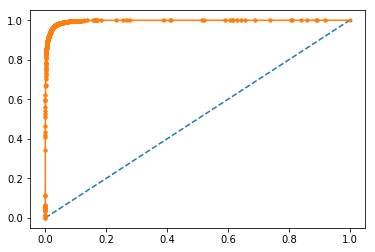


Classifier with best test set accuracy: Random Forest


In [92]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(X_train_res, y_train_res)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    pred = gs.predict(X_train_res)
    print(f1_score(y_train_res, pred))
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    # Track best (highest test accuracy) model
    
    probs = gs.predict_proba(X_train_res)
    probs = probs[:, 1]
    auc = roc_auc_score(y_train_res, probs)
    print('AUC: %.3f' % auc)
    fpr, tpr, thresholds = roc_curve(y_train_res, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    if f1_score(y_test, y_pred) > best_acc:
        best_acc = f1_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

## ADABoost 

In [ ]:
print('\nEstimator: Ada Boost')
gs_ada.fit(X_train_res, y_train_res)
print('Best params: %s' % gs_ada.best_params_)
print('Best training F1 Score: %.3f' % gs_ada.best_score_)
y_pred = gs_ada.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))

## GBM

In [ ]:
print('\nEstimator: %s' % grid_dict[0])
gs_GBM.fit(X_train, y_train)
print('Best params: %s' % gs_GBM.best_params_)
print('Best training accuracy: %.3f' % gs_GBM.best_score_)
y_pred = gs_GBM.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))

## XGBoost Using Gridsearch

In [52]:
##print('\nEstimator: %s' % grid_dict[0])
gs_XGB.fit(X_train_res, y_train_res)
print('Best params: %s' % gs_XGB.best_params_)
print('Best training accuracy: %.3f' % gs_XGB.best_score_)
y_pred = gs_XGB.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'clf__colsample_bytree': 0.5, 'clf__gamma': 1.5, 'clf__learning_rate': 0.05, 'clf__max_depth': 10, 'clf__n_estimators': 500}
Best training accuracy: 0.387
Test set accuracy score for best params: 0.599 


In [79]:
probs = gs_XGB.predict(X_test1)
f1_score(y_test1,probs)

0.3323262839879154

AUC: 0.997


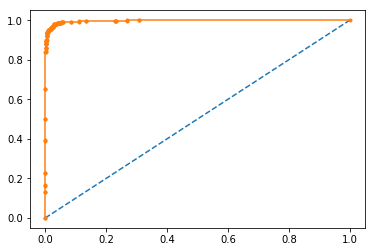

In [245]:
probs = gs_XGB.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

##y_pred1 = gs_XGB.predict(x_trn)

In [ ]:
y_pred1 = gs_XGB.predict(x_trn)

## Exicution of Ensomble Re-Sampling using AdaBoost 

In [ ]:
y_pred_proba = np.zeros(len(y_test))
for idx in range(len(y_train_res)):
    clf_base = AdaBoostClassifier()
    grid = {'n_estimators': [100,500],
           'learning_rate' : [0.1, 0.5,1.2]}

    cv = KFold(X_train_res.shape[0], shuffle=True, random_state=234)
    clf = GridSearchCV(clf_base, grid, cv=cv, scoring='f1')
    clf.fit(X_train_res[idx], y_train_res[idx])
    y_pred_proba += list(zip(*clf.predict_proba(X_test)))[0]

In [ ]:
y_pred_proba = y_pred_proba/len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
print (classification_report(y_test, y_pred))

In [ ]:
x = y_pred1
x

In [ ]:
df = pd.DataFrame(x,columns=['prediction'])
df['ID'] = x_trn.index
df = df[['ID','prediction']]
df

In [ ]:
df.to_csv('ss.csv',index=None,header=True)

## Bagging Classifier with XGBoost and Decission Tree

In [108]:
#print('\nEstimator: %s' % grid_dict[0])
gs_BBC.fit(X_train_res, y_train_res)
print('Best params: %s' % gs_BBC.best_params_)
print('Best training accuracy: %.3f' % gs_BBC.best_score_)
y_pred = gs_BBC.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'clf__max_features': 8, 'clf__n_estimators': 15}
Best training accuracy: 0.752
Test set accuracy score for best params: 0.286 


## CATBoost Manual tuning

In [237]:

#print('\nEstimator: %s' % grid_dict[0])
CAT = CatBoostClassifier(iterations = 100,learning_rate = 0.05,depth = 10,l2_leaf_reg = 0.5,eval_metric = 'F1',)
CAT.fit(X_train_res, y_train_res)

In [166]:
preds = CAT.predict(X_train_res)
	# Test data accuracy of model with best params
print('train set accuracy score for best params: %.3f ' % f1_score(y_train_res, preds))

y_pred = CAT.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))

Test set accuracy score for best params: 0.962 
Test set accuracy score for best params: 0.602 


## ADABoost Manual Tuning

In [187]:
ADAb = AdaBoostClassifier(base_estimator = (DecisionTreeClassifier(max_depth=10)),n_estimators = 500,learning_rate=0.05)
ADAb.fit(X_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=500, random_state=None)

In [188]:
preds = ADAb.predict(X_train_res)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_train_res, preds))

y_pred = ADAb.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))

Test set accuracy score for best params: 1.000 
Test set accuracy score for best params: 0.605 


## Function for feature importance

In [154]:
def feat_importance(best_features,algo):
    col = X_train_res.columns
    #modelname.feature_importance_
    y = best_features
    #plot
    fig, ax = plt.subplots() 
    width = 0.4 # the width of the bars 
    ind = np.arange(len(y)) # the x locations for the groups
    ax.barh(ind, y, width, color="green")
    ax.set_yticks(ind+width/10)
    ax.set_yticklabels(col, minor=False)
    plt.title('Feature importance in '+algo)
    plt.xlabel('Relative importance')
    plt.ylabel('feature') 
    plt.figure(figsize=(5,66))
    fig.set_size_inches(6.5, 15, forward=True)


## XGBoost with manual tuning 

In [151]:
XG = XGBClassifier(colsample_bytree= 0.7,
                    n_estimators = 600,
                    max_depth= 10,
                    learning_rate = 0.05,
                    gamma= 1,subsample = 0.8,reg_alpha = 0.5,reg_lambda = 0.5,scale_pos_weight = 1.96,min_child_weight = 5)
##print('\nEstimator: %s' % grid_dict[0])
XG.fit(X_train_res, y_train_res)
y_pred = XG.predict(X_test)
preds = XG.predict(X_train_res)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_train_res, preds))
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))


Test set accuracy score for best params: 1.000 
Test set accuracy score for best params: 0.674 


In [ ]:
y_pred1 = XG.predict(x_trn)


## Voting Classifier
### This Method is a kind of Stacking (0_0)

In [238]:
VCF = VotingClassifier(estimators=[('CAT', CAT), ('ADAB', ADAb), ('xgb',XG)], voting='soft')

In [239]:
VCF.fit(X_train_res,y_train_res)

0:	learn: 0.8019660	total: 1.96s	remaining: 3m 14s
1:	learn: 0.8186779	total: 3.89s	remaining: 3m 10s
2:	learn: 0.8324162	total: 5.78s	remaining: 3m 7s
3:	learn: 0.8448170	total: 7.66s	remaining: 3m 3s
4:	learn: 0.8491580	total: 9.54s	remaining: 3m 1s
5:	learn: 0.8520098	total: 11.4s	remaining: 2m 59s
6:	learn: 0.8509210	total: 13.3s	remaining: 2m 57s
7:	learn: 0.8523287	total: 15.2s	remaining: 2m 55s
8:	learn: 0.8577487	total: 17.1s	remaining: 2m 52s
9:	learn: 0.8608740	total: 19s	remaining: 2m 50s
10:	learn: 0.8608928	total: 20.9s	remaining: 2m 48s
11:	learn: 0.8737638	total: 22.8s	remaining: 2m 46s
12:	learn: 0.8761343	total: 24.6s	remaining: 2m 44s
13:	learn: 0.8778885	total: 26.5s	remaining: 2m 42s
14:	learn: 0.8794891	total: 28.4s	remaining: 2m 41s
15:	learn: 0.8787292	total: 30.3s	remaining: 2m 39s
16:	learn: 0.8805665	total: 32.2s	remaining: 2m 37s
17:	learn: 0.8853726	total: 34.1s	remaining: 2m 35s
18:	learn: 0.8930026	total: 35.9s	remaining: 2m 33s
19:	learn: 0.8945666	total:

VotingClassifier(estimators=[('CAT', <catboost.core.CatBoostClassifier object at 0x000002398F12F358>), ('ADAB', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            mi...eg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1.96, seed=None,
       silent=True, subsample=0.8))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [249]:
preds = VCF.predict(X_train_res)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_train_res, preds))

y_pred = VCF.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))

Test set accuracy score for best params: 1.000 
Test set accuracy score for best params: 0.661 


In [250]:
y_pred1 = VCF.predict(x_trn)

In [251]:
x = y_pred1
x

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [252]:
df = pd.DataFrame(x,columns=['prediction'])
df['ID'] = x_trn.index
df = df[['ID','prediction']]
df

,ID,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [253]:
df.to_csv('ss3.csv',index=None,header=True)